# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head(3)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,September,2021
1,1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,September,2021


### Movies vs. TV shows

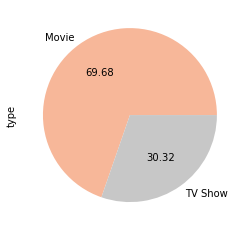

In [3]:
df["type"].value_counts().plot(kind = "pie", autopct = "%.2f", colors=sns.color_palette("RdGy", n_colors=2))

### Countries of Production

In [4]:
from collections import Counter

country_data = df['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)

top10count = sum(country_counting[:10])
totalcount = sum(country_counting)

print(f'total countries production count: {totalcount}')
print(f'top 10 countries production count: {top10count}')
print(f'percentage : {top10count}/{totalcount} = {100 * top10count/totalcount}')


total countries production count: 10837
top 10 countries production count: 8206
percentage : 8206/10837 = 75.72206330165174


/Users/momofeng/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


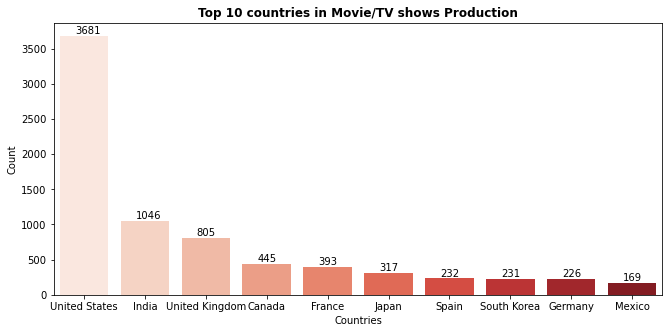

In [5]:
top10country = country_counting[:11].drop('No Data')

from matplotlib import gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(nrows=1, ncols=2,height_ratios=[6], width_ratios=[10, 5])

plot1 = plt.subplot(gs[0])
sns.barplot(top10country.index, top10country, ax=plot1, palette="Reds")
plot1.set_xticklabels(top10country.index)
plt.xlabel('Countries')
plt.ylabel('Count')
plot1.set_title('Top 10 countries in Movie/TV shows Production', fontsize=12, fontweight='bold')
for i in plot1.patches:
    plot1.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')

### Number of Movies/TV shows released each year

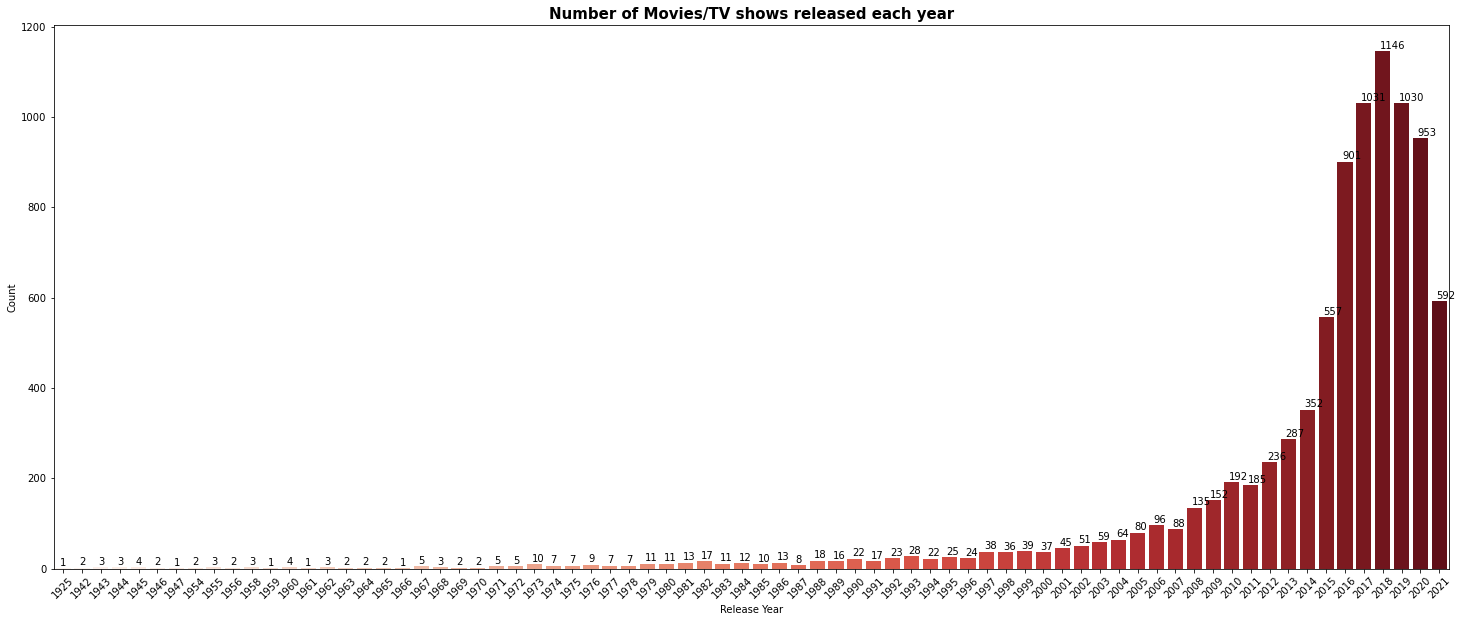

In [6]:
plt.figure(figsize = (25, 10))
ax = sns.countplot(x = 'release_year', data = df, palette = "Reds")
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Number of Movies/TV shows released each year', fontsize=15, fontweight='bold')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')

### Content added in Netflix Month-wise

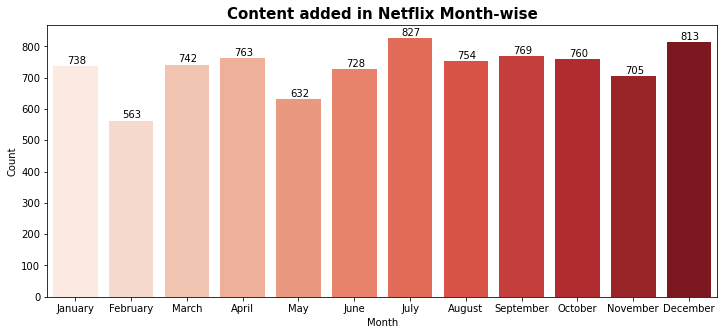

In [7]:
plt.figure(figsize = (12, 5))
df['month_added'] = pd.Categorical(df['month_added'], ['January', 'February', 'March', 
                                                       'April', 'May', 'June', 'July','August', 
                                                       'September', 'October', 'November', 'December'])
ax = sns.countplot(x = 'month_added', data = df, palette = "Reds")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content added in Netflix Month-wise', fontsize=15, fontweight='bold')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')

### Content added in Netflix year-wise

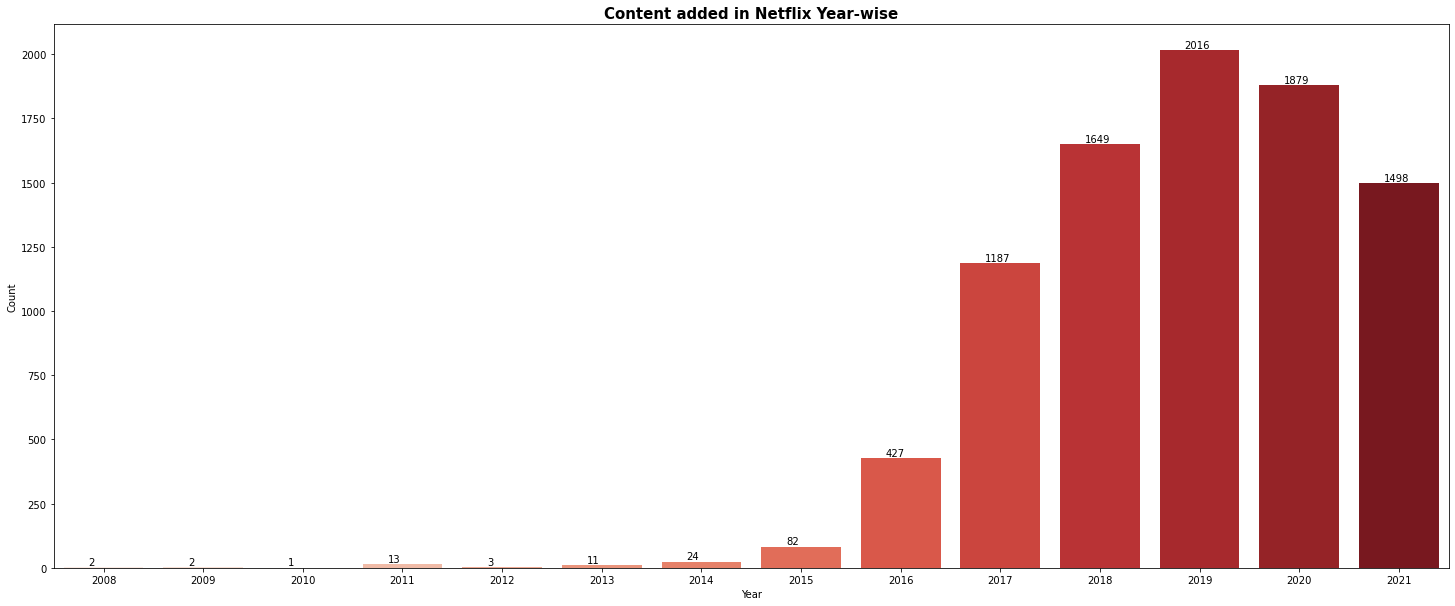

In [8]:
plt.figure(figsize = (25, 10))
ax = sns.countplot(x = 'year_added', data = df, palette = "Reds")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content added in Netflix Year-wise', fontsize=15, fontweight='bold')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')

### Rating Distribution

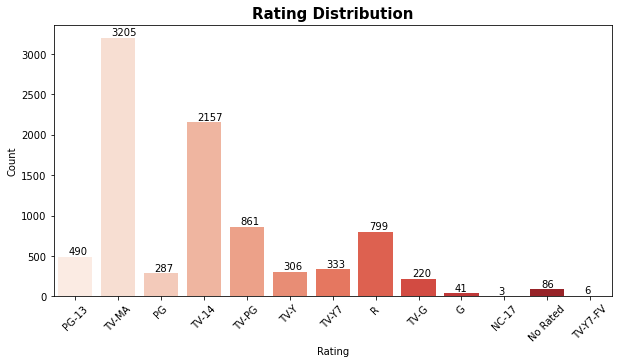

In [9]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'rating', data = df, palette = "Reds")
plt.title('Rating Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')

### Genre distribution

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']
movie['genre'] = movie['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
tv_show['genre'] = tv_show['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

<ipython-input-10-8b5375174da2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['genre'] = movie['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
<ipython-input-10-8b5375174da2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['genre'] = tv_show['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))


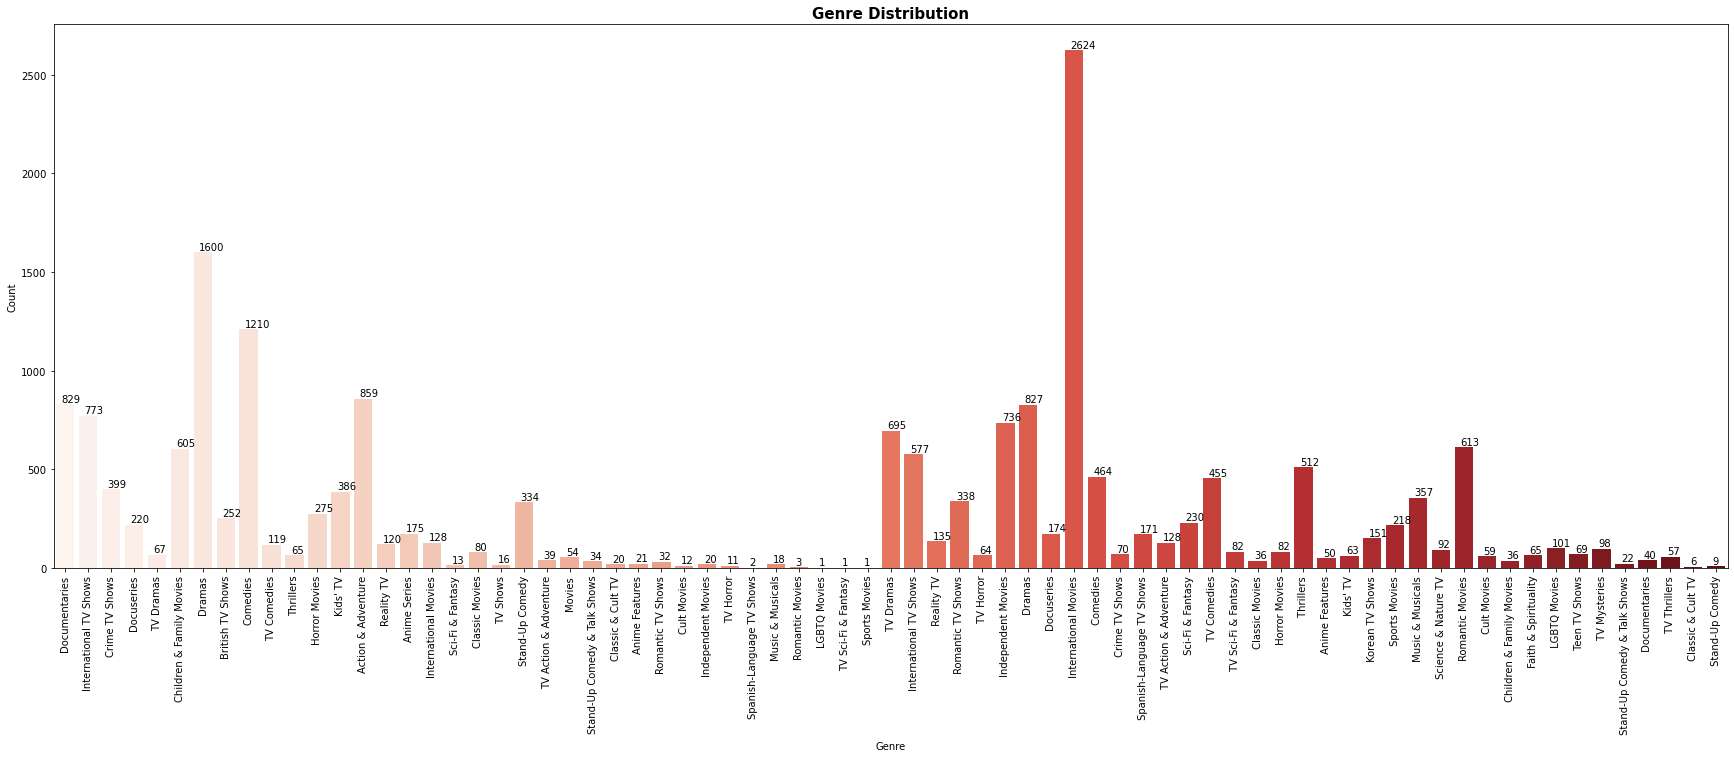

In [11]:
genre_count = df.copy()
genre_count = pd.concat([genre_count, df['listed_in'].str.split(',', expand=True)])
genre_count = genre_count.melt(id_vars = ['type', 'title'], value_vars = range(3), value_name = 'genre')
genre_count = genre_count[genre_count['genre'].notna()]

plt.figure(figsize = (30, 10))
ax = sns.countplot(x = 'genre', data = genre_count, palette = "Reds")
plt.title('Genre Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va = 'bottom', color = 'black')


In [12]:
movie['genre']

0                                         [Documentaries]
6                              [Children & Family Movies]
7       [Dramas, Independent Movies, International Mov...
9                                      [Comedies, Dramas]
12                         [Dramas, International Movies]
                              ...                        
8788            [Dramas, International Movies, Thrillers]
8789                     [Cult Movies, Dramas, Thrillers]
8791                            [Comedies, Horror Movies]
8792                 [Children & Family Movies, Comedies]
8793     [Dramas, International Movies, Music & Musicals]
Name: genre, Length: 6128, dtype: object

In [13]:
Types = []
for i in movie['genre']: 
    Types += i
Types_set = set(Types)
print(f"There are {len(Types_set)} types in the Netflix Movie Dataset") 

There are 20 types in the Netflix Movie Dataset


In [14]:
Movie_genre_dict = {}
for item in Types:
    if item in Movie_genre_dict:
        Movie_genre_dict[item] += 1
    else:
        Movie_genre_dict[item] = 1
        
Movie_genre_dict

{'Documentaries': 869,
 'Children & Family Movies': 641,
 'Dramas': 2427,
 'Independent Movies': 756,
 'International Movies': 2752,
 'Comedies': 1674,
 'Thrillers': 577,
 'Romantic Movies': 616,
 'Music & Musicals': 375,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 243,
 'Action & Adventure': 859,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Sports Movies': 219,
 'Cult Movies': 71,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'Stand-Up Comedy': 343,
 'Movies': 54}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

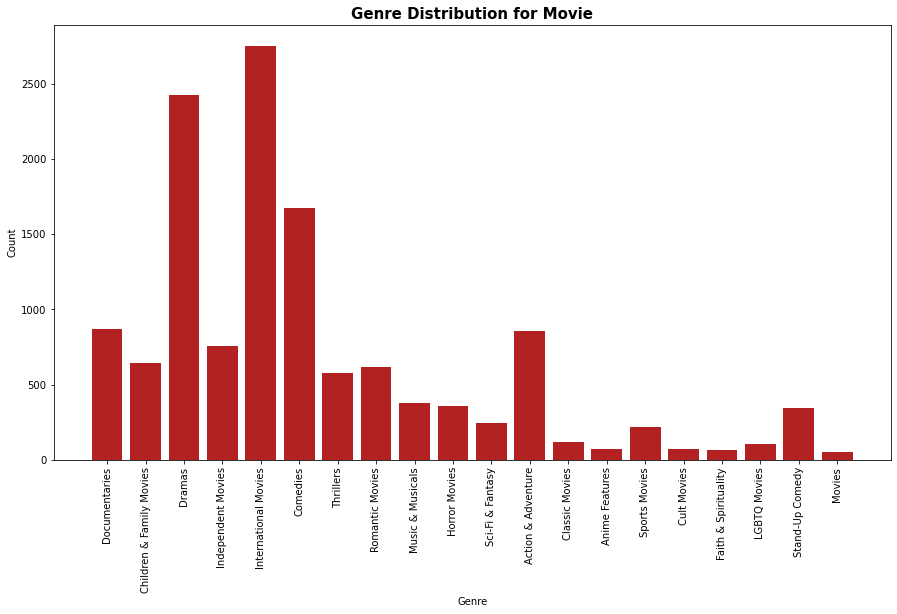

In [15]:
names = list(Movie_genre_dict.keys())
values = list(Movie_genre_dict.values())

plt.figure(figsize = (15, 8))
plt.bar(names, values, color='firebrick')
plt.title('Genre Distribution for Movie', fontsize=15, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)

In [16]:
tv_show['genre']

1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
5                    [TV Dramas, TV Horror, TV Mysteries]
                              ...                        
8782                             [Anime Series, Kids' TV]
8783                  [International TV Shows, TV Dramas]
8784                                           [Kids' TV]
8787    [International TV Shows, Romantic TV Shows, TV...
8790             [Kids' TV, Korean TV Shows, TV Comedies]
Name: genre, Length: 2666, dtype: object

In [17]:
Types_tv = []
for i in tv_show['genre']: 
    Types_tv += i
Types_tv_set = set(Types_tv)
print(f"There are {len(Types_tv_set)} types in the Netflix TV shows Dataset") 

There are 22 types in the Netflix TV shows Dataset


In [18]:
TV_genre_dict = {}
for item in Types_tv:
    if item in TV_genre_dict:
        TV_genre_dict[item] += 1
    else:
        TV_genre_dict[item] = 1
        
TV_genre_dict

{'International TV Shows': 1350,
 'TV Dramas': 762,
 'TV Mysteries': 98,
 'Crime TV Shows': 469,
 'TV Action & Adventure': 167,
 'Docuseries': 394,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'TV Comedies': 574,
 'TV Horror': 75,
 'British TV Shows': 252,
 'Spanish-Language TV Shows': 173,
 'TV Thrillers': 57,
 "Kids' TV": 449,
 'TV Sci-Fi & Fantasy': 83,
 'Anime Series': 175,
 'Korean TV Shows': 151,
 'Science & Nature TV': 92,
 'Teen TV Shows': 69,
 'TV Shows': 16,
 'Stand-Up Comedy & Talk Shows': 56,
 'Classic & Cult TV': 26}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text major ticklabel objects>)

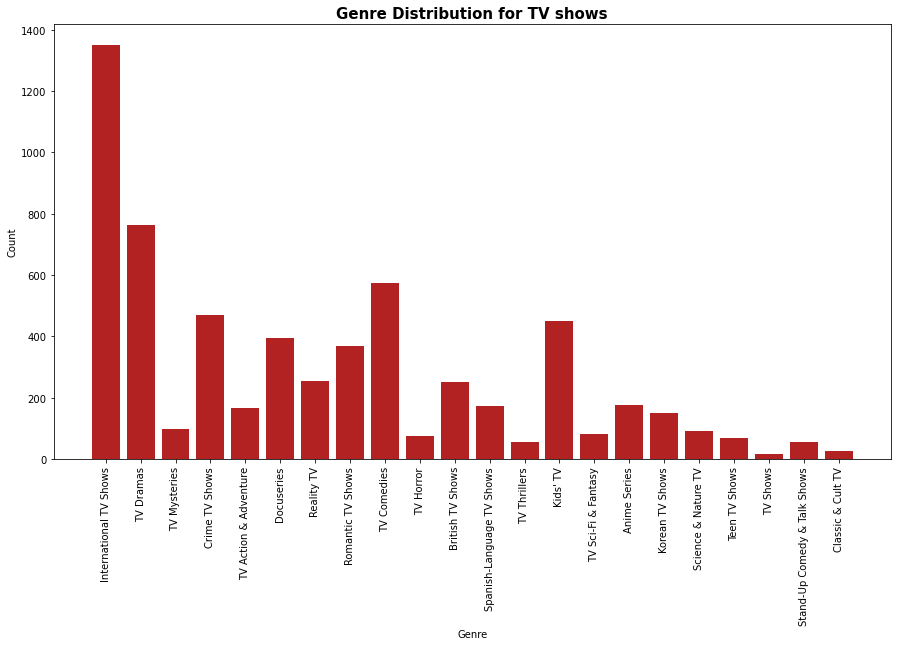

In [19]:
names2 = list(TV_genre_dict.keys())
values2 = list(TV_genre_dict.values())

plt.figure(figsize = (15, 8))
plt.bar(names2, values2, color='firebrick')
plt.title('Genre Distribution for TV shows', fontsize=15, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)

### Correlation Heatmap For Genre

Text(0.5, 1.0, 'Correlation Heatmap for Movie Genre')

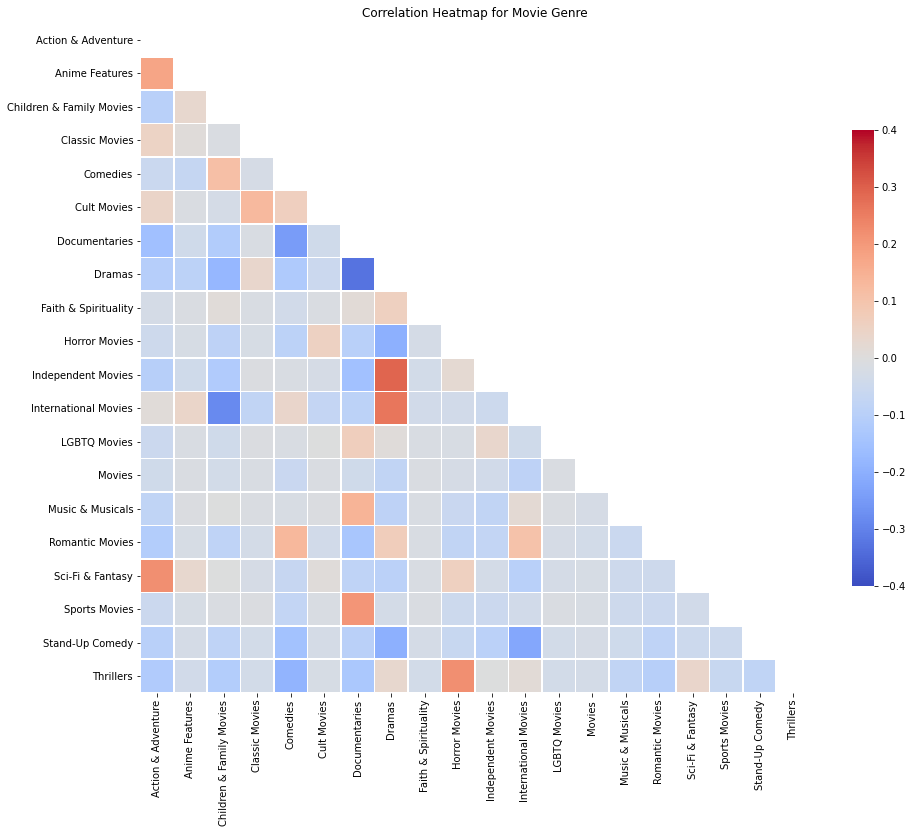

In [20]:
movie_genre = movie['genre']
datafram = pd.DataFrame(mlb.fit_transform(movie_genre), columns=mlb.classes_, index=movie_genre.index)
correlation = datafram.corr()
movie_map = np.zeros_like(correlation, dtype=np.bool)
movie_map[np.triu_indices_from(movie_map)] = True
    
fig, ax = plt.subplots(figsize=(15, 14))
plot = sns.heatmap(correlation, mask=movie_map, cmap= "coolwarm", vmax=.4, vmin=-.4, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
plt.title('Correlation Heatmap for Movie Genre')


Text(0.5, 1.0, 'Correlation Heatmap for TV shows Genre')

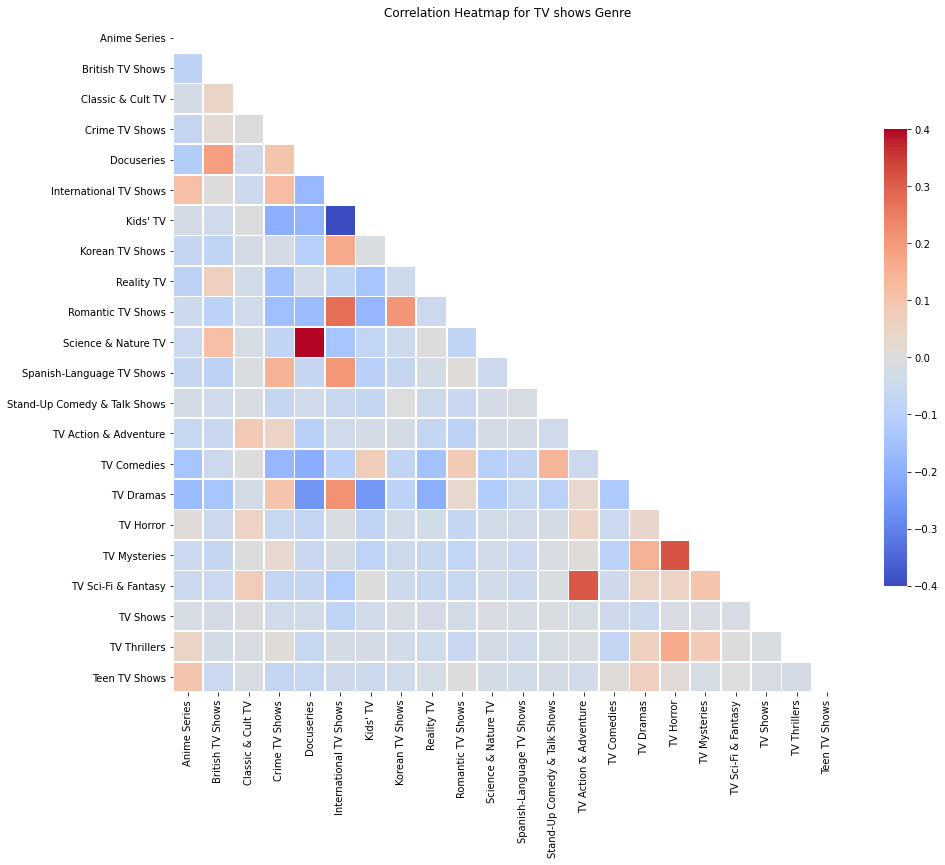

In [21]:
tv_genre = tv_show['genre']
datafram_tv = pd.DataFrame(mlb.fit_transform(tv_genre), columns=mlb.classes_, index=tv_genre.index)
correlation_tv = datafram_tv.corr()
tv_map = np.zeros_like(correlation_tv, dtype=np.bool)
tv_map[np.triu_indices_from(tv_map)] = True
    
fig, ax = plt.subplots(figsize=(15, 14))
plot = sns.heatmap(correlation_tv, mask=tv_map, cmap= "coolwarm", vmax=.4, vmin=-.4, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
plt.title('Correlation Heatmap for TV shows Genre')


### Genre distribution based on age group

In [22]:
age_group = ['Younger kids','Older Kids','Teens','Adults']
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

In [23]:
movie_rating = movie['rating'].value_counts()[rating_order]
movie_rating

G             41
TV-Y         131
TV-G         126
PG           287
TV-Y7        139
TV-Y7-FV       5
TV-PG        540
PG-13        490
TV-14       1427
R            797
NC-17          3
TV-MA       2062
Name: rating, dtype: int64

In [24]:
rating_order2 = ['TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA','No Rated']
tv_rating = tv_show['rating'].value_counts()[rating_order2].fillna(0)
tv_rating

TV-Y         175
TV-G          94
TV-Y7        194
TV-Y7-FV       1
TV-PG        321
TV-14        730
R              2
TV-MA       1143
No Rated       6
Name: rating, dtype: int64

In [25]:
Movie_rating_on_age = [0,0,0,0]
for i in range(len(rating_order)):
    if rating_order[i] == 'G'or rating_order[i] == 'TV-Y'or rating_order[i] == 'TV-G':
        Movie_rating_on_age[0] += movie_rating[i]
    elif rating_order[i] == 'PG'or rating_order[i] == 'TV-Y7'or rating_order[i] == 'TV-Y7-FV'or rating_order[i] == 'TV-PG':
        Movie_rating_on_age[1] += movie_rating[i]
    elif rating_order[i] == 'PG-13'or rating_order[i] == 'TV-14':
        Movie_rating_on_age[2] += movie_rating[i]
    else: 
        Movie_rating_on_age[3] += movie_rating[i]
Movie_rating_on_age

[298, 971, 1917, 2862]

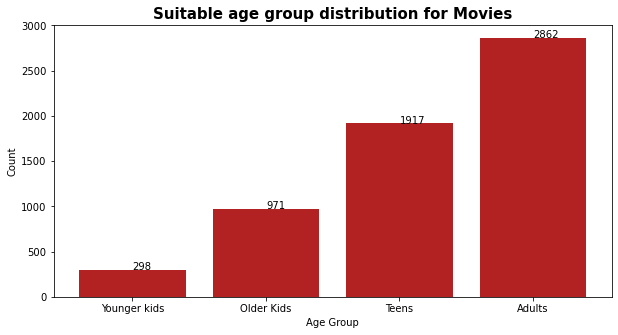

In [26]:
plt.figure(figsize = (10, 5))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

ax = plt.bar(age_group, Movie_rating_on_age, color='firebrick')
plt.title('Suitable age group distribution for Movies', fontsize=15, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Count')
addlabels(age_group, Movie_rating_on_age)

In [27]:
tv_rating_on_age = [0,0,0,0]
for i in range(len(rating_order2)):
    if rating_order2[i] == 'TV-Y'or rating_order2[i] == 'TV-G':
        tv_rating_on_age[0] += tv_rating[i]
    elif rating_order2[i] == 'TV-Y7'or rating_order2[i] == 'TV-Y7-FV'or rating_order2[i] == 'TV-PG':
        tv_rating_on_age[1] += tv_rating[i]
    elif rating_order2[i] == 'TV-14':
        tv_rating_on_age[2] += tv_rating[i]
    elif rating_order2[i] == 'R'or rating_order2[i] =='TV-MA': 
        tv_rating_on_age[3] += tv_rating[i]
tv_rating_on_age

[269, 516, 730, 1145]

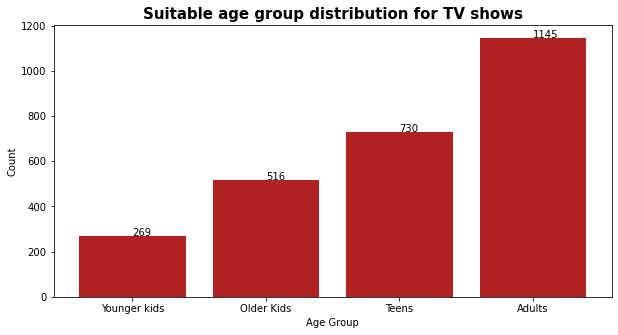

In [28]:
plt.figure(figsize = (10, 5))
ax = plt.bar(age_group, tv_rating_on_age, color='firebrick')
plt.title('Suitable age group distribution for TV shows', fontsize=15, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Count')
addlabels(age_group, tv_rating_on_age)

### Director

In [29]:
director = df[df.director!='No Data'].set_index('title').director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

director

title
Dick Johnson Is Dead                Kirsten Johnson
Ganglands                           Julien Leclercq
Midnight Mass                         Mike Flanagan
My Little Pony: A New Generation      Robert Cullen
My Little Pony: A New Generation     José Luis Ucha
                                         ...       
Zinzana                             Majid Al Ansari
Zodiac                                David Fincher
Zombieland                          Ruben Fleischer
Zoom                                   Peter Hewitt
Zubaan                                  Mozez Singh
Length: 6975, dtype: object

In [30]:
director.value_counts()

Rajiv Chilaka      22
Raúl Campos        18
 Jan Suter         18
Suhas Kadav        16
Marcus Raboy       16
                   ..
Louie Psihoyos      1
Brendon Marotta     1
Rima Das            1
Chris Burkard       1
Sam de Jong         1
Length: 5119, dtype: int64

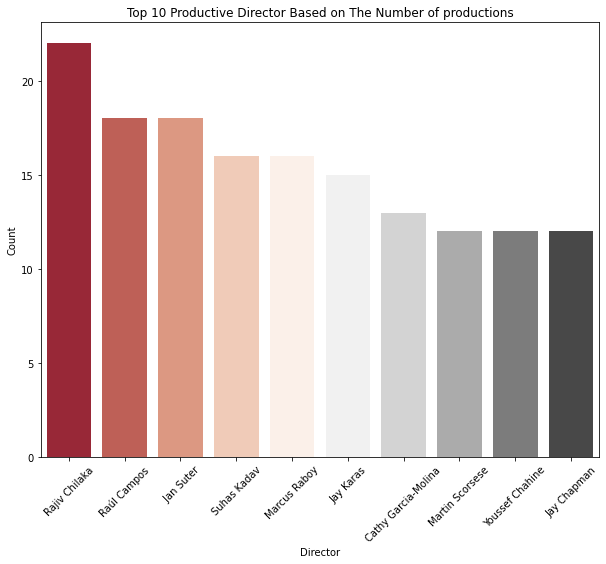

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x = director, order=director.value_counts().index[:10], palette='RdGy')
plt.title('Top 10 Productive Director Based on The Number of productions')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

### Cast

In [32]:
tv_shows = df[df.type == 'TV Show'].copy()
movie = df[df.type == 'Movie'].copy()

In [33]:
cast_m = movie[movie.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
cast_m.value_counts()


 Anupam Kher       38
 Rupa Bhimani      27
 Om Puri           27
Shah Rukh Khan     26
 Paresh Rawal      25
                   ..
 Akihisa Shiono     1
 Mozhan Marnò       1
 Lenny Henry        1
 Britt Flatmo       1
 Paula Manzone      1
Length: 27878, dtype: int64

In [34]:
cast_tv = tv_shows[tv_shows.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

cast_tv.value_counts()

 Takahiro Sakurai           24
 Ai Kayano                  17
 Junichi Suwabe             17
 Yuki Kaji                  17
 Daisuke Ono                14
                            ..
 Ross Philips                1
Sherry Alhadad               1
 Gianluca Gallucci           1
 Hugo Speer                  1
La Terremoto de Alcorcón     1
Length: 15450, dtype: int64

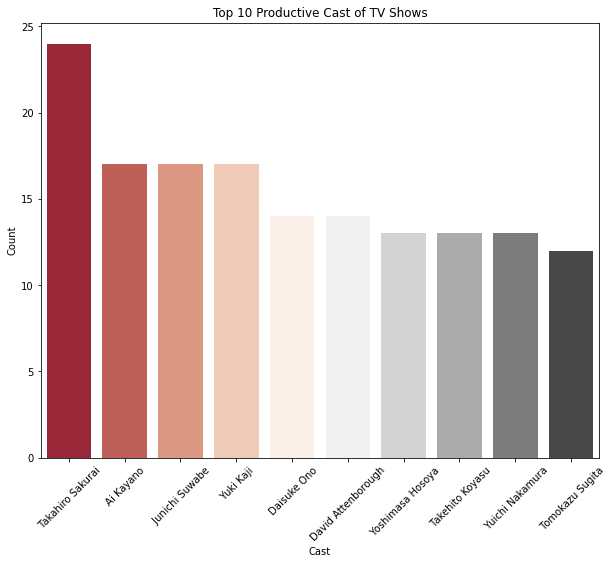

In [35]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = cast_tv, order=cast_tv.value_counts().index[:10], palette='RdGy')
plt.title('Top 10 Productive Cast of TV Shows')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

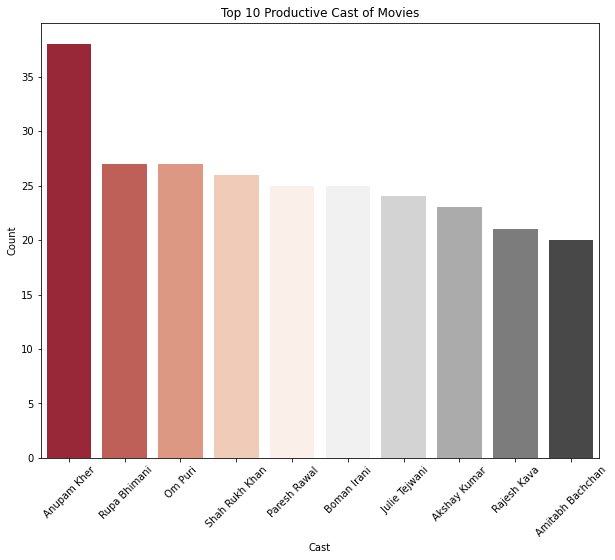

In [36]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = cast_m, order=cast_m.value_counts().index[:10], palette='RdGy')
plt.title('Top 10 Productive Cast of Movies')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

### Duration

In [37]:
movie['duration'].value_counts()

90 min     152
93 min     146
97 min     146
94 min     146
91 min     144
          ... 
208 min      1
191 min      1
178 min      1
10 min       1
189 min      1
Name: duration, Length: 205, dtype: int64

In [38]:
tv_shows['duration'].value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
15 Seasons       2
13 Seasons       2
12 Seasons       2
11 Seasons       1
17 Seasons       1
Name: duration, dtype: int64

In [39]:
# clean the duration data for movie by removing the min at the end of each string
movie['duration'] = movie['duration'].str.replace(' min','').astype(int)

In [40]:
# clean the duration data for tv shows by removing the season at the end of each string
# change the variable from duration to season
tv_shows['duration']=tv_shows['duration'].str.split(' ').str[0]
tv_shows.rename(columns = {'duration':'season'}, inplace = True)

In [41]:
movie['duration'].value_counts()

90     152
93     146
94     146
97     146
91     144
      ... 
228      1
224      1
212      1
208      1
8        1
Name: duration, Length: 205, dtype: int64

In [42]:
tv_shows['season'].value_counts()

1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
15       2
12       2
13       2
17       1
11       1
Name: season, dtype: int64

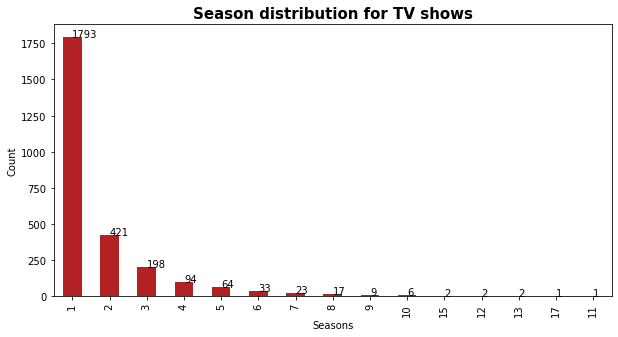

In [43]:
# Season of TV Show
plt.figure(figsize = (10, 5))
ax = tv_shows['season'].value_counts().plot(kind='bar', color='firebrick')

plt.title('Season distribution for TV shows', fontsize=15, fontweight='bold')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.xticks(rotation = 90)
addlabels(tv_shows['season'].value_counts(), tv_shows['season'].value_counts())

Text(0.5, 1.0, 'Duration distribution for movies')

<Figure size 1440x720 with 0 Axes>

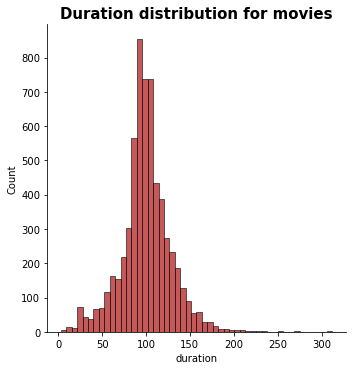

In [50]:
plt.figure(figsize = (20, 10))
ax = sns.displot(data=movie,x='duration',bins=50, color='firebrick')
plt.title('Duration distribution for movies', fontsize=15, fontweight='bold')